In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman.sigma_points import MerweScaledSigmaPoints
from filterpy.kalman import JulierSigmaPoints
from filterpy.common import Q_discrete_white_noise
import random

In [3]:
def bbusppg(num):     # Returns B-bus..

    linedata = linedatas(num);
    fb = linedata[:,0];  #first column 
    tb = linedata[:,1];  #2nd column 
    b = linedata[:,4];   #5th column
    nbus = int(np.max([np.max(fb),np.max(tb)]))    # no. of buses...
    nbranch = len(fb);           # no. of branches...
    bbus = np.mat(np.zeros((nbus,nbus)));

    for k in range (0,nbranch):
        bbus[int(fb[k]-1),int(tb[k]-1)] = b[k]
        bbus[int(tb[k]-1),int(fb[k]-1)] = bbus[int(fb[k]-1),int(tb[k]-1)];

    return bbus
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

In [4]:
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

def zdatas(i):

        #      |Msnt |Type | Value | From | To | Rii | 
        #---- Voltage Magnitude ------------#
        
        
    Pow_i= Pi[i];  

    zdata14   =  np.mat([[1 , 1  ,  Pow_i[0] , 1 ,   0 ,  9e-4],
             #-----------------------------------#
             #---- Real Power Injection ---------#
             [2 , 2  ,  Pow_i[1] ,  2 ,   0 ,  1e-4],
             [3 , 2 ,  Pow_i[2] ,  3 ,   0 ,  1e-4], 
             [4 , 2 ,  Pow_i[3] , 7 ,   0  , 1e-4],
             [5 , 2 ,  Pow_i[4]   , 8 ,   0  , 1e-4], 
             [6 , 2 ,  Pow_i[5] , 10 ,   0 ,  1e-4],
             [7 , 2 ,  Pow_i[6] , 11 ,   0 ,  1e-4],
             [8 , 2 ,  Pow_i[7], 12 ,   0 ,  1e-4], 
             [9 , 2 ,  Pow_i[8] , 14 ,   0 ,  1e-4],
             #------------------------------------#
             #---- Reative Power Injection -------#
             [10 , 3 ,   Pow_i[9] ,  2 ,   0 ,  1e-4],
             [11 , 3 ,   Pow_i[10] ,  3 ,   0 ,  1e-4], 
             [12 , 3 ,   Pow_i[11] , 7 ,   0  , 1e-4],
             [13 , 3 ,   Pow_i[12],  8 ,   0 ,  1e-4], 
             [14 , 3 ,  Pow_i[13] , 10 ,   0 ,  1e-4],
             [15 , 3 ,  Pow_i[14], 11 ,   0 ,  1e-4],
             [16 , 3 ,  Pow_i[15], 12 ,   0 ,  1e-4], 
             [17 , 3 ,  Pow_i[16], 14 ,   0 ,  1e-4],
             #------------------------------------#
             #------ Real Power Flow ------------- #
             [18 , 4 ,   Pow_i[17] ,  1 ,   2 ,  64e-6],
             [19 , 4 ,   Pow_i[18],  2 ,   3 ,  64e-6],
             [20 , 4 ,  Pow_i[19] ,  4 ,   2 ,  64e-6],
             [21 , 4 ,   Pow_i[20] ,  4 ,   7 ,  64e-6],
             [22 , 4 ,   Pow_i[21] ,  4 ,   9 ,  64e-6],
             [23 , 4 ,  Pow_i[22] ,  5 ,   2 ,  64e-6],
             [24 , 4 ,   Pow_i[23],  5 ,   4 ,  64e-6],
             [25 , 4 ,   Pow_i[24],  5 ,   6 ,  64e-6],
             [26 , 4 ,   Pow_i[25] ,  6 ,  13 ,  64e-6],
             [27 , 4 ,   Pow_i[26] ,  7 ,   9 ,  64e-6],
             [28 , 4 ,  Pow_i[27] , 11 ,   6 ,  64e-6],
             [29 , 4 ,  Pow_i[28] , 12 ,  13 ,  64e-6],
             #------------------------------------#
             #------ Reactive Power Flow -------- #
             [30 , 5 ,  Pow_i[29] ,  1 ,   2 ,  64e-6],
             [31 , 5 ,  Pow_i[30] ,  2 ,   3 ,  64e-6],
             [32 , 5 ,  Pow_i[31] ,  4 ,   2 ,  64e-6],
             [33 , 5 ,  Pow_i[32] ,  4 ,   7 ,  64e-6],
             [34 , 5 ,  Pow_i[33] ,  4 ,  9 ,  64e-6],
             [35 , 5 ,  Pow_i[34] ,  5 ,   2 ,  64e-6],
             [36 , 5 ,  Pow_i[35] ,  5 ,   4 ,  64e-6],
             [37 , 5 ,  Pow_i[36] ,  5 ,   6 ,  64e-6],
             [38 , 5 ,  Pow_i[37] ,  6 ,  13 ,  64e-6],
             [39 , 5 ,  Pow_i[38] ,  7 ,   9 ,  64e-6],
             [40 , 5 ,  Pow_i[39] , 11 ,   6 ,  64e-6],
             [41 , 5 ,  Pow_i[40] , 12 ,  13 ,  64e-6]]);
             #--------------------------------------#


    # Just in case you want to add other systems, add the data above 
    # and change the following condition accordingly
    if num == 3:
        zdt =zdata3;
    elif num==14:
        zdt = zdata14;
    elif num==30:
        zdt = zdata30
        
             
    return zdt

In [5]:
# Line data function

def  linedatas(num):

    # ,    |  From |  To   |   R     |   X     |     B/2  |  X'mer  |
    # ,    |  Bus  | Bus   |  pu     |  pu     |     pu   | TAP (a) |
    linedat14 = np.mat([[1 ,   2 ,  0.01938  , 0.05917  ,  0.0264 ,    1],
                       [1 ,    5 ,  0.05403  , 0.22304  ,  0.0246 ,    1],
                       [2 ,    3 ,  0.04699  , 0.19797  ,  0.0219 ,    1],
                       [2 ,    4 ,  0.05811  , 0.17632  ,  0.0170 ,    1],
                       [2 ,    5 ,  0.05695  , 0.17388  ,  0.0173 ,    1],
                       [3 ,    4 ,  0.06701  , 0.17103  ,  0.0064 ,    1],
                       [4 ,    5 ,  0.01335  , 0.04211  ,  0.0    ,    1],
                       [4 ,    7 ,  0.0      , 0.20912  ,  0.0 ,   0.978],
                       [4 ,    9 ,  0.0      , 0.55618  ,  0.0 ,   0.969],
                       [5 ,    6 ,  0.0      , 0.25202  ,  0.0 ,   0.932],
                       [6 ,    11,  0.09498  , 0.19890  ,  0.0 ,       1],
                       [6 ,    12,  0.12291  , 0.25581  ,  0.0 ,       1],
                       [6 ,    13,  0.06615  , 0.13027  ,  0.0 ,       1],
                       [7 ,    8 ,  0.0      , 0.17615  ,  0.0 ,       1],
                       [7 ,    9 ,  0.0      , 0.11001  ,  0.0 ,       1],
                       [9 ,    10,  0.03181  , 0.08450  ,  0.0 ,       1],
                       [9 ,    14,  0.12711  , 0.27038  ,  0.0 ,       1],
                       [10 ,   11,  0.08205  , 0.19207  ,  0.0 ,       1],
                       [12 ,   13,  0.22092  , 0.19988  ,  0.0 ,       1],
                       [13 ,   14,  0.17093  , 0.34802  ,  0.0 ,       1]]);


    if num == 3:
        linedt = linedat3;
    elif num==14: 
        linedt = linedat14;
    elif num==30:
        linedt = linedat30;
        
             
    return linedt

In [6]:
# Returns ybus
def ybusppg(num):  

    linedata = linedatas(num); # Calling "linedata6.m" for Line Data...
    fb = linedata[:,0];     # From bus number... i.e in the column 1
    tb = linedata[:,1];     # To bus number...
    r = linedata[:,2];      # Resistance, R...
    x = linedata[:,3];      # Reactance, X...
    b = linedata[:,4];      # Ground Admittance, B/2...
    a = linedata[:,5];      # Tap setting value..
    z = r + x*1j;            # Z matrix...
    y = 1/z;               # To get inverse of each element...
    b = b*1j;                # Make B imaginary...

    nbus = int(np.max([np.max(fb),np.max(tb)]));    # no. of buses...(14 in this case)
    nbranch = len(fb) # no. of branches...(= 20)
    ybus = np.mat(np.zeros((nbus,nbus), dtype=complex));       # Initialise YBus...
    
    # Formation of the Off Diagonal Elements...
    for k in range (0,nbranch):
        ybus[int(fb[k]-1),int(tb[k]-1)] =ybus[int(fb[k]-1),int(tb[k]-1)]- (y[k]/a[k]);
        ybus[int(tb[k]-1),int(fb[k]-1)] = ybus[int(fb[k]-1),int(tb[k]-1)];
 
 
    # Formation of Diagonal Elements....
    for m in range (0,nbus):
        for n in range (0,nbranch):
            if fb[n]-1 == m:
                ybus[m,m]=ybus[m,m]+ (y[n]/(a[n]**2)) + b[n]
            elif tb[n]-1 ==m:
                ybus[m,m]=ybus[m,m]+y[n]
                

    return ybus

In [7]:

# here we get the 27*41 matrix
def HJacobian_at1(x):
    num=14;
    del_T=0.001;
    ybus = ybusppg(num); # Get YBus..
    zdata = zdatas(1); # Get Measurement data..
    
    #in every iteration we take a new row to consider from the csv file we imported
    V=x[13:]
    del1 = np.zeros(num);
    del1[1:]=x[0:13]
    
    bpq = bbusppg(num); # Get B data..
    nbus = int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
    type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
#     z = zdata[:,2]; # Measuement values..
    fbus = zdata[:,3]; # From bus..
    tbus = zdata[:,4]; # To bus..
    Ri = np.diagflat(zdata[:,5]) # Measurement Error..
   
    G = ybus.real;
    B = ybus.imag 
    E = np.matrix(np.concatenate((del1[1:], V)))# E is the state matrix of 27*1

    vi = np.mat((type1 == 1).nonzero())[0,:]; # Index of measurements..
    ppi = np.mat((type1 == 2).nonzero())[0,:];
    qi = np.mat((type1 == 3).nonzero())[0,:]
    pf = np.mat((type1 == 4).nonzero())[0,:]
    qf = np.mat((type1 == 5).nonzero())[0,:]

    nvi = vi.shape[1]; # Number of Voltage measurements..
    npi = ppi.shape[1]; # Number of Real Power Injection measurements..
    nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
    npf = pf.shape[1]; # Number of Real Power Flow measurements..
    nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..
    H11=np.mat(np.zeros((nvi,nbus-1)))

    H12=np.mat(np.zeros((nvi,nbus)))
    for k in range(0,nvi):
        for n in range(0,nvi):
            if n == k:
                 H12[k,n]=1

    H21=np.mat(np.zeros((npi,nbus-1)))
    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                    H21[i,k] += V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
                H21[i,k] -= (V[m]**2)*B[m,m]
            else:
                H21[i,k]=V[m]*V[k+1]*(G[m,k+1]*np.sin(del1[m]-del1[k+1]) - B[m,k+1]*np.cos(del1[m]-del1[k+1]))

    H22=np.mat(np.zeros((npi,nbus)))
    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                    H22[i,k] += V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H22[i,k] += V[m]*G[m,m]
            else:
                H22[i,k]=V[m]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))

    H31=np.mat(np.zeros((nqi,nbus-1)))
    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                     H31[i,k] += V[m]*V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H31[i,k] -= (V[m]**2)*G[m,m]
            else:
                H31[i,k]=V[m]*V[k+1]*(-G[m,k+1]*np.cos(del1[m]-del1[k+1]) - B[m,k+1]*np.sin(del1[m]-del1[k+1]))

    H32=np.mat(np.zeros((nqi,nbus)))
    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                     H32[i,k] += V[n]*(G[m,n]*np.sin(del1[m]-del1[n]) - B[m,n]*np.cos(del1[m]-del1[n]))
                H32[i,k] -= V[m]*B[m,m]
            else:
                H32[i,k]=V[m]*(G[m,k]*np.sin(del1[m]-del1[k]) - B[m,k]*np.cos(del1[m]-del1[k]))

    H41=np.mat(np.zeros((npf,nbus-1)))
    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                H41[i,k] = V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            elif k+1 == n:
                H41[i,k] = -V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H41[i,k] = 0

    H42=np.mat(np.zeros((npf,nbus)))
    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H42[i,k] = -V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n])) -2*G[m,n]*V[m]
            elif k == n:
                H42[i,k] = -V[m]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H42[i,k] = 0

    H51=np.mat(np.zeros((nqf,nbus-1)))
    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                 H51[i,k] = -V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            elif k+1 == n:
                H51[i,k] = V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H51[i,k] = 0

    H52=np.mat(np.zeros((nqf,nbus)))
    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H52[i,k] = -V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n])) -2*V[m]*(-B[m,n]+bpq[m,n])
            elif k == n:
                H52[i,k] = -V[m]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H52[i,k] = 0

    H1=np.mat(np.concatenate((H11,H12),axis=1))
    H2=np.mat(np.concatenate((H21,H22),axis=1))
    H3=np.mat(np.concatenate((H31,H32),axis=1))
    H4=np.mat(np.concatenate((H41,H42),axis=1))
    H5=np.mat(np.concatenate((H51,H52),axis=1))

    H=np.mat(np.concatenate((H1,H2,H3,H4,H5)))
    return H
    

In [8]:
def Hx(x):

    num=14;
    del_T=0.001;
    ybus = ybusppg(num); # Get YBus..
    zdata = zdatas(1); # Get Measurement data..
    
    #in every iteration we take a new row to consider from the csv file we imported

    V=x[13:]
    del1 = np.zeros(num);
    del1[1:]=x[0:13]
    bpq = bbusppg(num); # Get B data..
    nbus = int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
    type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
    z = zdata[:,2]; # Measuement values..
    fbus = zdata[:,3]; # From bus..
    tbus = zdata[:,4]; # To bus..
    Ri = np.diagflat(zdata[:,5]) # Measurement Error..
   
    G = ybus.real;
    B = ybus.imag 
    E = np.matrix(np.concatenate((del1[1:], V)))# E is the state matrix of 27*1

    vi = np.mat((type1 == 1).nonzero())[0,:] # Index of measurements..
    ppi =np.mat((type1 == 2).nonzero())[0,:]
    qi = np.mat((type1 == 3).nonzero())[0,:]
    pf = np.mat((type1 == 4).nonzero())[0,:]
    qf = np.mat((type1 == 5).nonzero())[0,:]

    nvi = vi.shape[1]; # Number of Voltage measurements..
    npi = ppi.shape[1]; # Number of Real Power Injection measurements..
    nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
    npf = pf.shape[1]; # Number of Real Power Flow measurements..
    nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..

    h1 = np.mat(V[int(fbus[vi])-1]);
    h2 = np.mat(np.zeros((npi,1)));
    h3 = np.mat(np.zeros((nqi,1)));
    h4 = np.mat(np.zeros((npf,1)));
    h5 = np.mat(np.zeros(((nqf,1))));
    

    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            h2[i] += V[m]*V[k]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))

    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            h3[i] += V[m]*V[k]*((G[m,k]*np.sin(del1[m]-del1[k])) - (B[m,k]*np.cos(del1[m]-del1[k])))

    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        h4[i] = -(V[m]**2)*G[m,n] - V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))

    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        h5[i] = -(V[m]**2)*(-B[m,n]+bpq[m,n]) - V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))

    h111=np.mat(np.concatenate((h1,h2,h3,h4,h5)))
    h= np.zeros(41)
    for i1 in range (41):
        h[i1]=h111[i1]
    return h

In [9]:
def fx(x, dt):
    F=np.identity(27)
    FdotX=np.dot(F, x)
    # print(FdotX)
    return FdotX

zdata shape (41, 6)
(41, 41)


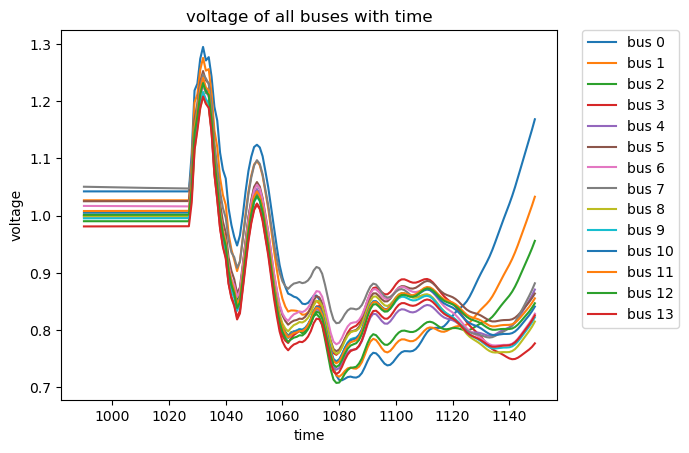

In [10]:
Pi=pd.read_csv("C:/Users/hp/Downloads/CaseNum_245Results_fault_modified.csv")
nbus=14;
Pi= Pi.to_numpy();
num=14




dim_x = 27 # state dimension
dim_z = 41 # measurement dimension
zdata = zdatas(0)




points = MerweScaledSigmaPoints(n=dim_x, alpha=0.1, beta=2.0, kappa=1.0)

#need to improve on the values of alpha beta kappa for better results of z-h rest is good
#now z-h is good but alpha beta kappa can be improved



kf = UnscentedKalmanFilter(dim_x=dim_x, dim_z=dim_z, dt=0.1, fx=fx, hx=Hx, points=points)
initial_state = np.ones(27)  # Initial state vector
for i in range(13,27):
    initial_state[i]=1
kf.x=initial_state

kf.P = np.eye(dim_x) * 0.1 # initial state covariance matrix
kf.Q = np.eye(dim_x)*1e-5 # process noise covariance matrix
kf.R = np.diagflat(zdata[:,5]) *1e-2# measurement noise covariance matrix
# kf.R =np.eye(dim_z)*1e-3
# for i1 in range(41):
#     y=zdata[i1,5]
#     kf.R[i1][i1]=
print(kf.R.shape)
c=0

#doing for bus wise results
x_g=[]
y_g=[]
for i2 in range(14):
    y_g.append([])
for i in range (950,1150):
    # h1=Hx(kf.x)
    zdata = zdatas(i)
    z1 = zdata[:,2]
    z= np.zeros(41)
    for i1 in range (41):
        z[i1]=z1[i1]
    kf.predict() # predict step
    kf.update(z) # update step
    

     # ++++++++++++++++++++++
    # Presenting the results
    # ===================

    # print(i,end="  ")
    # print("state \n\n",kf.x[13:])

    c+=1
    if(c>40):
        for i1 in range(13,27):
            y_g[i1-13].append(kf.x[i1])
        
        x_g.append(i)
        
        # plot.plot(range(1,nbus+1),kf.x[13:],label=f'{i}')
    # if(i%1000==0):
    # plot.title('Voltage Magnitude')
    # plot.xlabel('Bus number')
    # plot.ylabel('Magnitude (p.u.)')
    # plot.xlim(1,nbus)
    # plot.show()  
    


    # ++++++++++++++++++++++
    # end of the results
    # ===================
for i2 in range(14):
    plot.plot(x_g,y_g[i2],label=f'bus {i2}')
plot.title('voltage of all buses with time')
plot.xlabel('time')
plot.ylabel('voltage')
plot.legend(bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plot.show()
# plot.title('Voltage Magnitude')
# plot.xlabel('Bus number')
# plot.ylabel('Magnitude (p.u.)')
# plot.xlim(1,nbus)
# plot.show()  


